In [16]:
import os
import h5py
import numpy as np
import pandas as pd
from data_helpers import grouper
from tempConv import tempConvDecoder
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## get and format data
# lfp power bands
neural_data_file = h5py.File('datasets/GRat31_636061_all_sorted_spikes.hdf5', 'r')
neural_data = np.asarray(neural_data_file['sorted_spikes']) # iterate through powerbands
neural_data.shape

(80690, 34)

In [11]:
head_signals_h5 = h5py.File('datasets/GRat31_636061_all_head_data.hdf5', 'r')
idx_start, idx_stop = [3,9]

# dx
head_signal = np.asarray(
    [np.asarray(head_signals_h5[key]) for key in head_signals_h5.keys()][0:9]
).T[:,idx_start:idx_stop]
print('head_signals shape: ', head_signal.shape)

# head_signals_keys = list(head_signals_h5.keys())[0:9][idx_start:idx_stop]
# head_signals_int = ['yaw_abs', 'roll_abs', 'pitch_abs']
# print('head_signals_keys intuitive: ', head_signals_int)

head_signals shape:  (80690, 6)


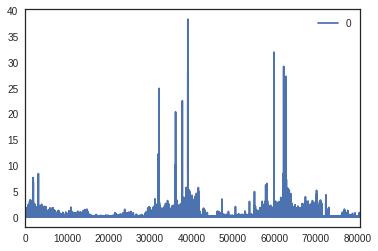

In [12]:
# try taking absolute magnitude of all dx, dy, dz
# y = np.log(1+np.sqrt(np.square(head_signal[:,0])+np.square(head_signal[:,1])+np.square(head_signal[:,2])))
y = np.sqrt(np.square(head_signal[:,0])+np.square(head_signal[:,1])+np.square(head_signal[:,2]))
pd.DataFrame(y).plot()

In [6]:
stats = []

X_train and y_train shape: (3195, 60, 3) (3195, 1)
Train on 3195 samples, validate on 798 samples
Epoch 1/45
3195/3195 [==============================] - 0s - loss: 0.6930 - binary_accuracy: 0.5152 - val_loss: 0.6931 - val_binary_accuracy: 0.5025
Epoch 2/45
3195/3195 [==============================] - 0s - loss: 0.6934 - binary_accuracy: 0.5218 - val_loss: 0.6932 - val_binary_accuracy: 0.5025
Epoch 3/45
3195/3195 [==============================] - 0s - loss: 0.6930 - binary_accuracy: 0.5158 - val_loss: 0.6932 - val_binary_accuracy: 0.5025
Epoch 4/45
3195/3195 [==============================] - 0s - loss: 0.6927 - binary_accuracy: 0.5161 - val_loss: 0.6934 - v

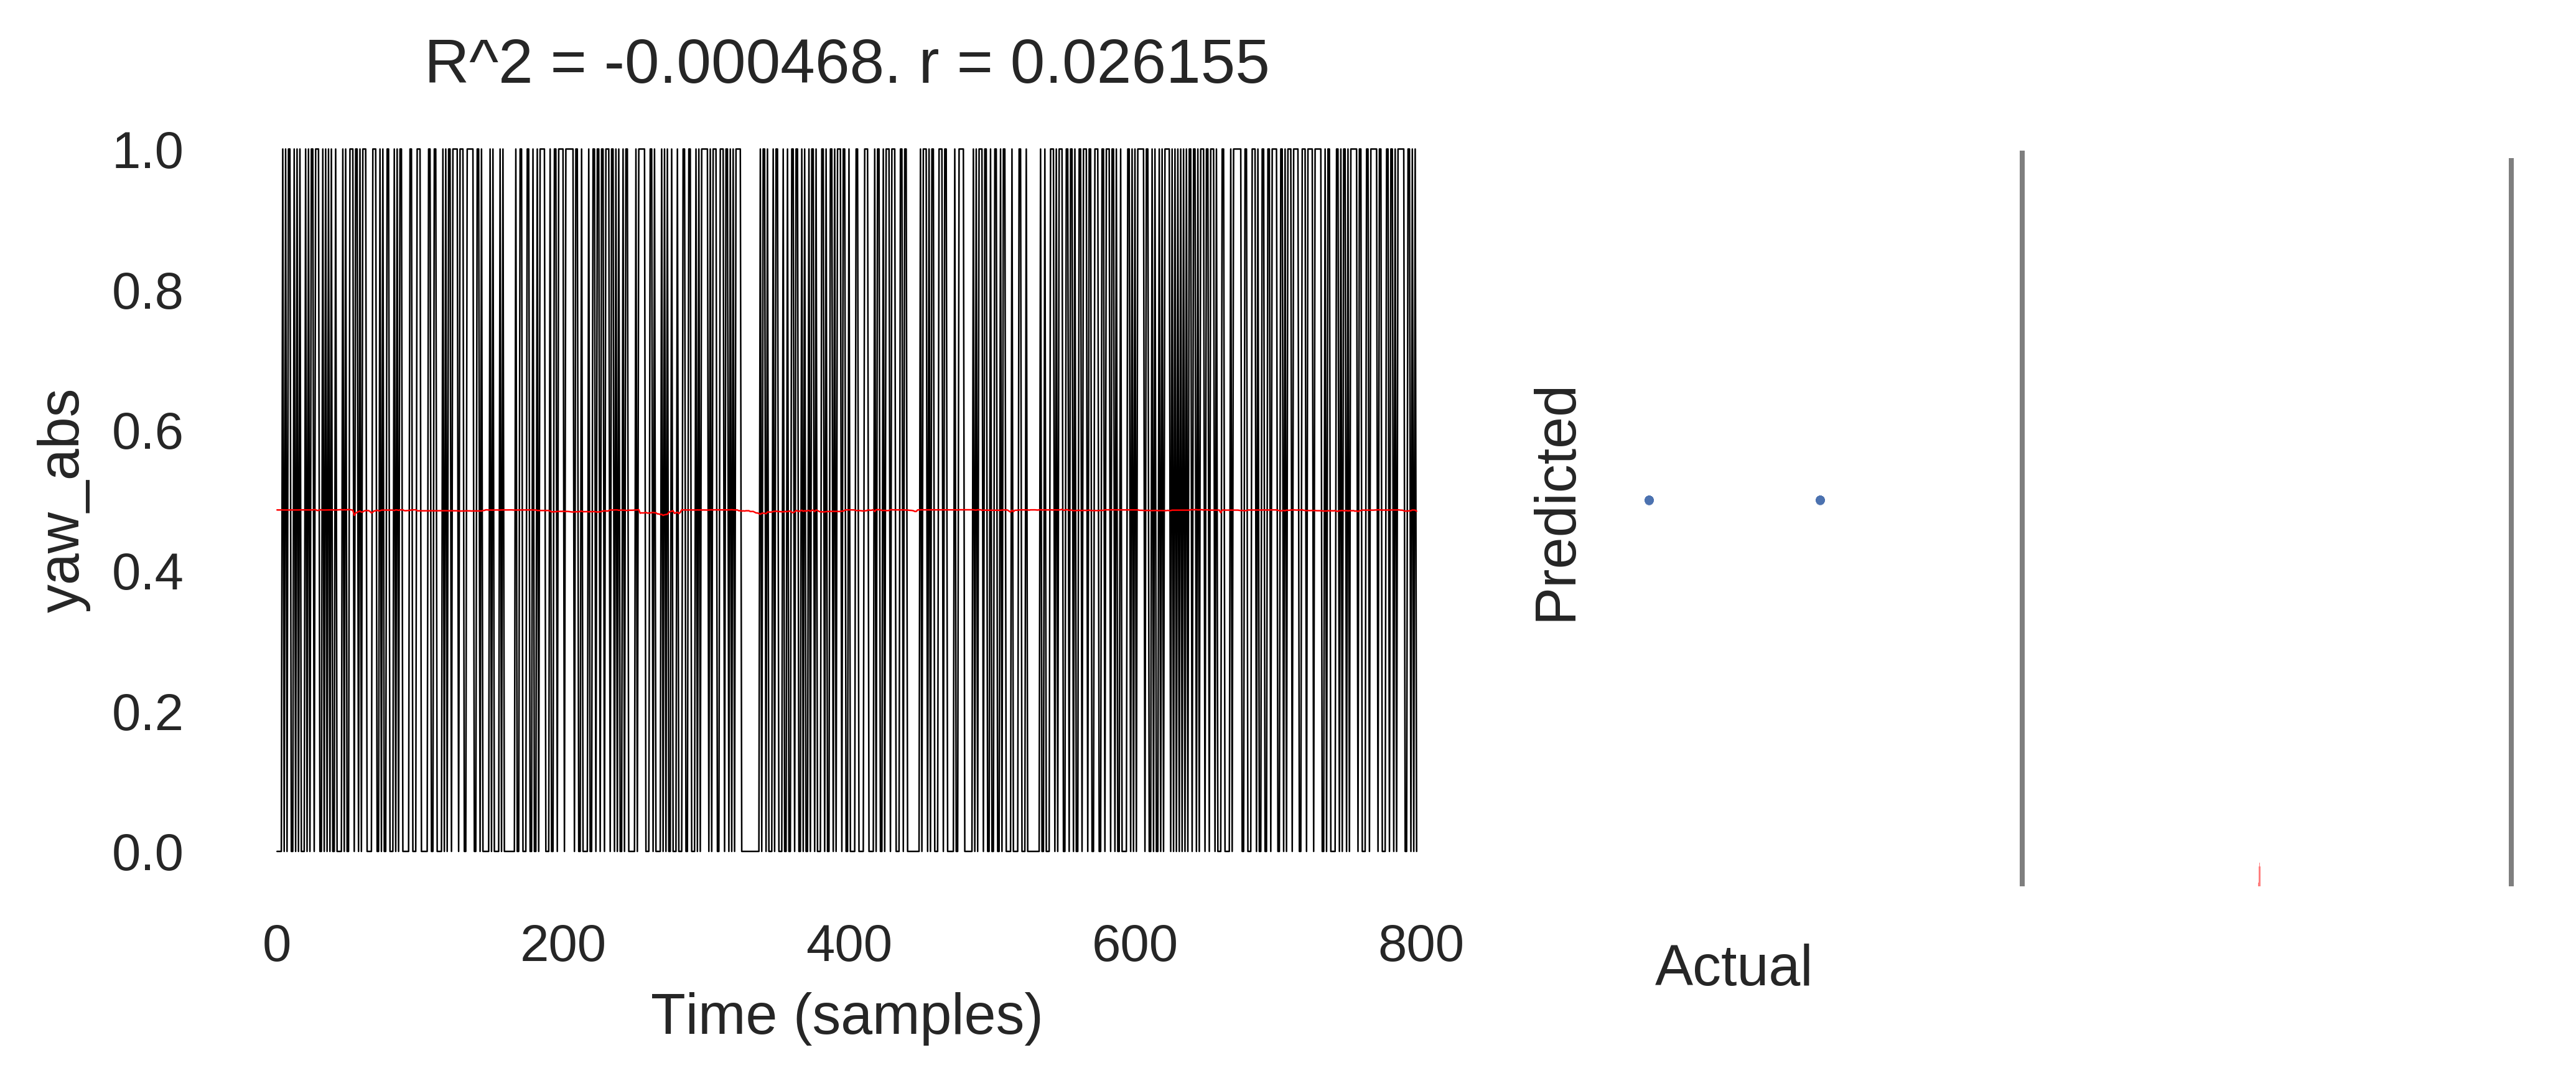

In [25]:
TCD = tempConvDecoder(
    head_signal[:,3:],head_signal[:,0],['yaw_abs'],window=60, offset=30, nb_filter=10, 
    eps=45, regressor=False, lr=0.0001
)
# TCD = tempConvDecoder(
#     head_signal[:,3:],head_signal[:,0],['yaw_abs'],window=60, offset=30, nb_filter=10, 
#     eps=45, regressor=True, resample_data=True, sample_size=25000, lr=0.0001
# )
TCD.fit()
R2s,rs = TCD.determine_fit(plot_result=True)
stats.append([R2s, rs])

In [31]:
print(stats)

[[[-0.52361587862080761], [0.099797001765492097]], [[-0.2926196556441738], [0.087206555053363069]], [[-0.21122167772357536], [0.20804793961128409]], [[-0.25124186480467814], [0.16692648233337878]], [[-0.33844131997519744], [0.14176417827483609]], [[-0.098466310305185489], [0.16184368214179062]], [[-0.10711339658180719], [0.02954998520786388]], [[-0.057603631296665236], [0.026903275143270306]], [[-0.17517221316867526], [0.10191286983062958]]]
